In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_parquet('../../data/weather_hourly_philadelphia_cleaned.parquet')
df_weather.head()

,max_temp,min_temp,precip
date_time,,,
2016-01-01 00:00:00,6.7,6.7,0.0
2016-01-01 01:00:00,7.2,7.2,0.0
2016-01-01 02:00:00,6.7,6.7,0.0
2016-01-01 03:00:00,6.7,6.7,0.0
2016-01-01 04:00:00,6.1,6.1,0.0


In [3]:

yp = df_weather["min_temp"].values

xp = df_weather["max_temp"].values


Text(0, 0.5, 'demand')

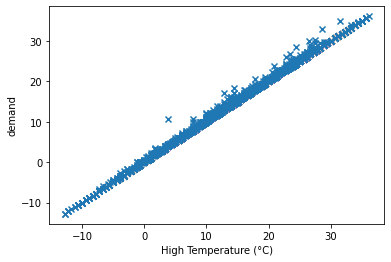

In [4]:
plt.scatter(yp, xp, marker='x')
plt.xlabel("High Temperature (°C)")
plt.ylabel("demand")

#Macht keinen Sinn...

In [5]:
df_stations = pd.read_parquet('../../data/stations.parquet')
df_stations.head()

,lat,lon,name,id
0,39.962380,-75.161712,"Spring Garden Station, BSL, Philadelphia, PA",3059
1,39.942987,-75.160208,"11th & South, Philadelphia, PA",3101
2,39.979946,-75.155375,"13th & Montgomery, Philadelphia, PA",3031
3,39.941168,-75.145552,"2nd & South, Philadelphia, PA",3026
4,39.956799,-75.182270,"Amtrak 30th Street Station, Philadelphia, PA",3022


In [6]:
df_btc = pd.read_parquet('../../data/bike_trips_cleaned.parquet')
df_btc.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,end_station_name,start_station_name,duration,start_lat,start_lon,end_lat,end_lon,distance,speed,average_time,date_time,max_temp,min_temp,precip
index,,,,,,,,,,,,,,,,,,,,
0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,3041,3564,Indego30,"Girard Station, MFL",2nd & Market,0 days 00:10:00,39.949895,-75.143749,39.969241,-75.136180,1.005648,6.033888,2016-01-01 00:09:00,2016-01-01 00:00:00,6.7,6.7,0.0
1,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,3019,2629,Indego30,6th & Race,4th & Bainbridge,0 days 00:22:00,39.940735,-75.149370,39.954694,-75.149496,0.397798,1.084905,2016-01-01 00:18:00,2016-01-01 00:00:00,6.7,6.7,0.0
2,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,3066,3430,Indego30,19th & Lombard,"11th & Pine, Kahn Park",0 days 00:13:00,39.945123,-75.159952,39.945664,-75.173272,1.480278,6.832050,2016-01-01 00:20:30,2016-01-01 00:00:00,6.7,6.7,0.0
3,2016-01-01 00:20:00,2016-01-01 00:30:00,3045,3028,3715,Indego30,4th & Bainbridge,13th & Locust,0 days 00:10:00,39.947947,-75.162361,39.940735,-75.149370,1.458133,8.748797,2016-01-01 00:25:00,2016-01-01 00:00:00,6.7,6.7,0.0
4,2016-01-01 00:20:00,2016-01-01 00:42:00,3005,3064,3351,Walk-up,"18th & Washington, Chew Playground","Welcome Park, NPS",0 days 00:22:00,39.947383,-75.144145,39.938280,-75.173873,3.313616,9.037136,2016-01-01 00:31:00,2016-01-01 01:00:00,7.2,7.2,0.0


Features that could be used: duration, distance, rainy, season, weekday, temp, start and end stations
In general different weather conditions like:
1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

=> Integrate that either in one parquet or use the feature engineering code for all the regression analysis 

Idea: Linear regression using LASSO regularization to look, if the features are important
From Lec.: "This type of regularization (L1) can lead to zero coefficients of particular features so LASSO also helps in feature selection"

In [11]:
#TRIED TO DROP COLUMNS FROM DF_BTC, BUT DIDN'T WORK.. 
#=> WANT TO DROP UNIMPORTANT FEATURES AND CREATE NEW ONES TO TEST THEM LATER

#columnsToDrop = ['start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'usertype', 'start_lat', 'start_lon', 'end_lat', 'end_lon']
#df_btc.drop(columnsToDrop, axis=1, inplace=True)

#columns = df_btc.columns.values
#for x in columns:
#    sns.distplot(bikesData[x], kde=True)
#    plt.show()
